# Erhan Asad Javed

## Pricing & Affordability Trends in NYC

#### What factors determine the price of an Airbnb listing in NYC?


#### Key research questions:
- How do room type, service fee, and cancellation policy impact price?
- What is the effect of neighbourhood group, latitude, and longitude on price variation?
- Does construction year play a role in listing price?
- How do reviews per month, review rate number, and number of reviews correlate with pricing?
- What role does availability 365 and minimum nights play in pricing strategies?

## EDA

### Imports

In [20]:
import os

import altair as alt
import pandas as pd
from toolz.curried import pipe
import numpy as np
import sys

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

sys.path.append(os.path.abspath("../../code"))
from cleaning_workflows import prepare_dataset

### Loading in the data

In [21]:
data = pd.read_csv('../../data/raw/Airbnb_Open_Data.csv', parse_dates=['last review'])
data.head()

/tmp/ipykernel_1073/168074796.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../data/raw/Airbnb_Open_Data.csv', parse_dates=['last review'])


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [22]:
data = prepare_dataset(data)
data.head()

/opt/conda/lib/python3.12/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10,9,2021-10-19,0.21,4,6.0,286.0,Clean up and treat the home the way you'd like...,Unknown
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30,45,2022-05-21,0.38,4,2.0,228.0,Pet friendly but please confirm with me if the...,Unknown
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Unknown,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3,0,2099-01-01,-1.00,5,1.0,352.0,"I encourage you to use my kitchen, cooking and...",Unknown
3,1002755,Unknown,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30,270,2019-07-05,4.64,4,1.0,322.0,Unknown,Unknown
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10,9,2018-11-19,0.10,3,1.0,289.0,"Please no smoking in the house, porch or on th...",Unknown


In [23]:
print(f'Dataset shape: \n{data.shape}')
print(f'Dataset columns: \n{data.columns}')
data.info()

Dataset shape: 
(102599, 26)
Dataset columns: 
Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102599 non-null  object        
 2   host id                         102599 non-null  int64         
 

In [24]:
data.describe().drop(columns=['id', 'host id'])

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599.000000,102599,102599.000000,102599.000000,102599.000000,102599.000000
mean,40.724840,-73.943956,2008.287751,623.785778,124.691586,8.103412,27.434722,2031-10-08 07:57:06.805329920,1.006600,3.268687,7.908820,140.512627
min,-1.000000,-74.249840,-1.000000,-1.000000,-1.000000,-1223.000000,0.000000,2012-07-11 00:00:00,-1.000000,0.000000,-1.000000,-10.000000
25%,40.688730,-73.982580,2007.000000,337.000000,67.000000,1.000000,1.000000,2019-01-02 00:00:00,0.090000,2.000000,1.000000,2.000000
50%,40.722290,-73.954440,2012.000000,623.000000,124.000000,3.000000,7.000000,2019-06-23 00:00:00,0.480000,3.000000,1.000000,95.000000
75%,40.762760,-73.932350,2017.000000,912.000000,182.000000,5.000000,30.000000,2022-01-02 00:00:00,1.710000,4.000000,2.000000,268.000000
max,40.916970,-1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2099-01-01 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.372667,0.646043,92.041761,332.690937,66.554848,30.497129,49.478373,NaN,1.820937,1.295823,32.172501,135.463570


In [25]:
data.describe(include=['object']).drop(columns=['NAME', 'host_identity_verified', 'host name'])

,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,house_rules,license
count,102599,102599,102599,102599,102599,102599,102599,102599,102599
unique,6,225,2,2,3,4,4,1977,2
top,Manhattan,Bedford-Stuyvesant,United States,US,False,moderate,Entire home/apt,Unknown,Unknown
freq,43793,7937,102067,102468,51474,34343,53701,52131,102597


### Preliminary analysis of attributes

In [26]:
data["NAME"].value_counts()

NAME
Unknown                                           250
Home away from home                                33
Water View King Bed Hotel Room                     30
Hillside Hotel                                     30
Brooklyn Apartment                                 27
                                                 ... 
♂ ♀ Sunny Bedroom in Popular Brooklyn               1
♂ ♀ Large Room Close to Express Subway + Bus        1
Clean room in Soho/Nolita                           1
♂ ♀ Large Sunny Bedroom Walk to Express Subway      1
Parisian Style Apartment in Heart of Brooklyn       1
Name: count, Length: 61282, dtype: int64

In [27]:
data["neighbourhood group"].value_counts()

neighbourhood group
Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Unknown             29
Name: count, dtype: int64

In [28]:
data["country"].value_counts()

country
United States    102067
Unknown             532
Name: count, dtype: int64

In [29]:
data["instant_bookable"].value_counts()

instant_bookable
False      51474
True       51020
Unknown      105
Name: count, dtype: int64

In [30]:
data["cancellation_policy"].value_counts()

cancellation_policy
moderate    34343
strict      34106
flexible    34074
Unknown        76
Name: count, dtype: int64

In [31]:
data["room type"].value_counts()

room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64

### Some basic visualizations

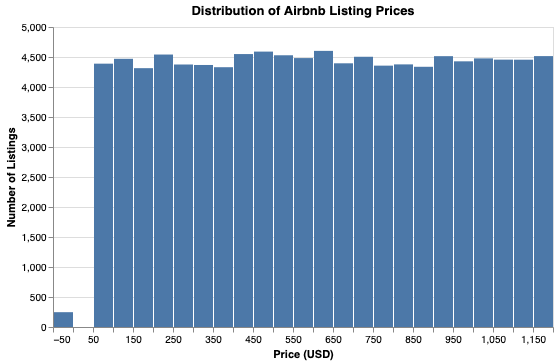

In [32]:
price_hist = alt.Chart(data).mark_bar().encode(
    x=alt.X('price:Q', bin=alt.BinParams(maxbins=50), title='Price (USD)'),
    y=alt.Y('count()', title='Number of Listings'),
    tooltip=['count()']
).properties(
    title="Distribution of Airbnb Listing Prices",
    width=500,
    height=300
)

price_hist

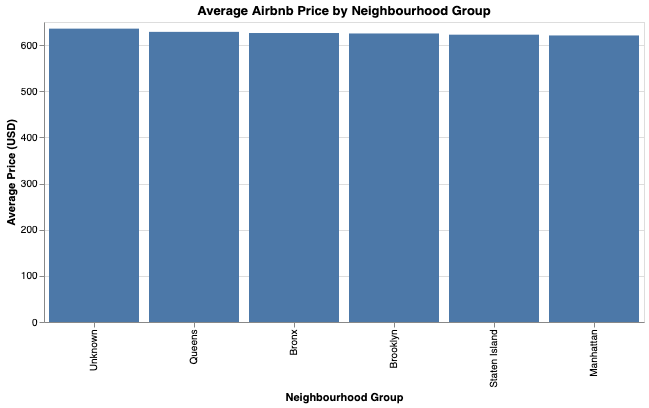

In [33]:
neighbourhood_group_price = alt.Chart(data).mark_bar().encode(
    x=alt.X('neighbourhood group:N', sort='-y', title='Neighbourhood Group'),
    y=alt.Y('mean(price):Q', title='Average Price (USD)'),
    tooltip=['mean(price)', 'neighbourhood group:N']
).properties(
    title="Average Airbnb Price by Neighbourhood Group",
    width=600,
    height=300
)

neighbourhood_group_price

In [34]:
neighbourhood_price = alt.Chart(data).mark_bar().encode(
    x=alt.X('neighbourhood:N', sort='-y', title='Neighbourhood'),
    y=alt.Y('mean(price):Q', title='Average Price (USD)'),
    color='neighbourhood group:N',
    tooltip=['neighbourhood', 'mean(price)', 'neighbourhood group:N']
).properties(
    title="Average Airbnb Price by Neighbourhood",
    width=600,
    height=300
)

neighbourhood_price

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [35]:
# Question 1: How do room type, service fee, and cancellation policy impact price?

# Boxplot for price distribution by room type
room_price = alt.Chart(data).mark_boxplot().encode(
    y=alt.Y('room type:N', title='Room Type'),
    x=alt.X('price:Q', title='Price (USD)'),
    color='room type:N'
).properties(title="Price Distribution by Room Type")

# Scatter plot for price vs service fee, colored by cancellation policy
service_fee_price = alt.Chart(data).mark_circle(size=60, opacity=0.5).encode(
    x=alt.X('service fee:Q', title='Service Fee (USD)'),
    y=alt.Y('price:Q', title='Price (USD)'),
    color=alt.Color('cancellation_policy:N', title="Cancellation Policy"),
    tooltip=['service fee', 'price', 'cancellation_policy']
).properties(title="Price vs. Service Fee by Cancellation Policy")

# Boxplot for price distribution by cancellation policy
cancellation_price = alt.Chart(data).mark_boxplot().encode(
    y=alt.Y('cancellation_policy:N', title='Cancellation Policy'),
    x=alt.X('price:Q', title='Price (USD)'),
    color='cancellation_policy:N'
).properties(title="Price Distribution by Cancellation Policy")


room_price & cancellation_price | service_fee_price

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [36]:
# Question 2: Effect of neighbourhood group, latitude, and longitude on price variation

# Boxplot for price distribution by neighbourhood group
neighbourhood_price = alt.Chart(data).mark_boxplot().encode(
    y=alt.Y('neighbourhood group:N', title='Neighbourhood Group'),
    x=alt.X('price:Q', title='Price (USD)'),
    color='neighbourhood group:N'
).properties(title="Price Distribution by Neighbourhood Group")

# Scatter plot for geographical price distribution
filtered_data = data[(data["lat"] != -1) & (data["long"] != -1)].copy()
lat_long_price = alt.Chart(filtered_data).mark_circle(size=60, opacity=0.5).encode(
    x=alt.X('long:Q', title='Longitude', scale=alt.Scale(zero=False)),
    y=alt.Y('lat:Q', title='Latitude', scale=alt.Scale(zero=False)),
    color=alt.Color('price:Q', scale=alt.Scale(scheme='blues')),
    tooltip=['lat', 'long', 'price']
).properties(
    title="Geographical Distribution of Price",
    width=600,
    height=400
)

neighbourhood_price | lat_long_price

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [37]:
# Question 3: Does construction year play a role in listing price?

# Scatter plot for price vs construction year
construction_price = alt.Chart(data).transform_filter(
    alt.datum["Construction year"] >= 1950  # Only keep years 1950 and later
).mark_line().encode(
    x=alt.X('Construction year:O', title='Construction Year'),
    y=alt.Y('mean(price):Q', title='Price (USD)', scale=alt.Scale(zero=False)),
    #tooltip=['Construction year', 'price'],
    #color=alt.Color('room type:N', title='Room Type')
).properties(title="Mean Price vs. Construction Year")

# Line chart showing median price trends over construction years

# Filter out construction years before 1950
construction_trend = alt.Chart(data).transform_filter(
    alt.datum["Construction year"] >= 1950  # Only keep years 1950 and later
).mark_line().encode(
    x=alt.X('Construction year:O', title='Construction Year'),
    y=alt.Y('median(price):Q', title='Median Price (USD)'),
    tooltip=['Construction year', 'median(price)', 'room type:N'],
    color=alt.Color('room type:N', title='Room Type')
).properties(title="Median Price Trends by Construction Year (1950+)")

construction_price | construction_trend

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [38]:
# Question 4: Reviews per month, review rate number, and number of reviews correlation with price

# Scatter plot for price vs number of reviews
reviews_price = alt.Chart(data).mark_circle(size=50, opacity=0.5).encode(
    x=alt.X('number of reviews:Q', title='Number of Reviews'),
    y=alt.Y('price:Q', title='Price (USD)'),
    color=alt.Color('review rate number:Q', title='Review Rate'),
    tooltip=['number of reviews', 'price', 'review rate number']
).properties(title="Price vs. Number of Reviews and Rating")

# Line chart for average price by review rate number
review_rate_price = alt.Chart(data).mark_line().encode(
    x=alt.X('review rate number:O', title='Review Rating (1-5)'),
    y=alt.Y('mean(price):Q', title='Average Price (USD)', scale=alt.Scale(zero=False)),
    color=alt.Color('room type:N', title='Room Type'),
    tooltip=['review rate number', 'mean(price)']
).properties(title="Average Price by Review Rating")

reviews_price | review_rate_price

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting
